<a href="https://colab.research.google.com/github/pragneshbarik/AI-ML/blob/main/Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference for Common Machine Learning Algorithms and Data Visualization Techniques.
---

> **Author: Pragnesh Barik**


## **Contents**
1. **Supervised Learning**
      1. Linear Regression
      2. Logistic Regression
      3. Decision Trees
      4. Neural Networks
      5. Support Vector Machines    
2. **Unsupervised Learning**
    1. Principal Component Analysis
    2. K-Means
    3. Anomaly Detection



**Sources**
* [ML MOOC NPTEL](https://github.com/Santara/ML-MOOC-NPTEL)
* [Machine Learning Course by Stanford](https://www.holehouse.org/mlclass/)
* [Hands-on Machine Learning with
Scikit-Learn, Keras, and
TensorFlow by Aurélien Géron](https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf)

In [ ]:
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## **1. Linear Regression**



### **Theory** 

1. Hypothesis Function
$$h_\theta (x) = \theta_0 + \theta_1 x_1+ \theta_2 x_2\; ... + \:\theta_n x_n$$

2. Cost Function
$$J(\theta_0, \theta_1, ... \theta_n)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^i)-y^i)^2$$

3. Gradient Descent

$$\theta_j := \theta_j - α\frac{∂}{∂\theta_j}J(\theta_0, \theta_1, ... \theta_n)$$
$$\frac{∂}{∂θ_j}J(\theta_0, \theta_1, ... \theta_n)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i).x_j^i$$



### **Prepare Data**
To train a linear model according to the following function.

$$ y = \frac{x}{2}+sin(x)+\epsilon $$ 

$ϵ$ : Gaussian Noise $\in$ $(0,1)$



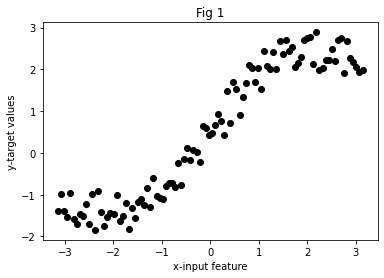

In [ ]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color = 'black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title("Fig 1")
plt.show()

### Split the dataset into training, validation and test sets

In [ ]:
random_indices = np.random.permutation(number_of_samples)
#Training Set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation Set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test Set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

### **Training the Model**


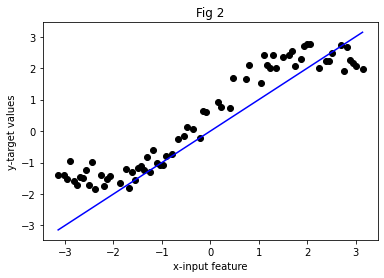

In [ ]:
model = linear_model.LinearRegression()

x_matrix = np.array(x_train.reshape(len(x_train), 1))
y_matrix = np.array(x_train.reshape(len(y_train), 1))

model.fit(x_matrix, y_matrix)

plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape(len(x), 1), model.predict(x.reshape(len(x),1)), color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title("Fig 2")
plt.show()

### **Evaluation of Model**



In [ ]:
val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val),1)))**2)
test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
print(f"Validation error : {val_error}\nTest Error : {test_error}")

Validation error : 6.229283379725232
Test Error : 2.941083488378707


## **2. Logisitic Regression**

### **Theory**


1. Hypothesis Function
$$h_\theta (x) = g(\theta^Tx)$$

$$\theta^Tx = \theta_0 + \theta_1 x_1+ \theta_2 x_2\; ... + \:\theta_n x_n$$

$$g(x) = \frac{1}{1+e^{-x}} $$ 

> g(x) is known as sigmoid function. 

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg)

2. Cost Function
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[\;y^i.\log(h_{\theta}(x^i))+(1-y^i).\log(1-h_\theta(x^i)\;]$$

3. Gradient Descent

$$\theta_j := \theta_j - α\frac{∂}{∂\theta_j}J(\theta_0, \theta_1, ... \theta_n)$$

$$\frac{∂}{∂θ_j}J(\theta_0, \theta_1, ... \theta_n)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i).x_j^i$$


### **Prepare Data**

To make a logistic regression model to predict if the handwritten digit is 8 or not. We will use the MNIST database of handwritten digits.

In [ ]:
mnist_df = pd.read_csv("drive/MyDrive/Datasets/mnist_digits_train.csv")
mnist_test_df = pd.read_csv("drive/MyDrive/Datasets/mnist_digits_test.csv")
mnist_df = mnist_df.fillna(0)
mnist_test_df = mnist_test_df.fillna(0)

display(mnist_df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Visualize Data**

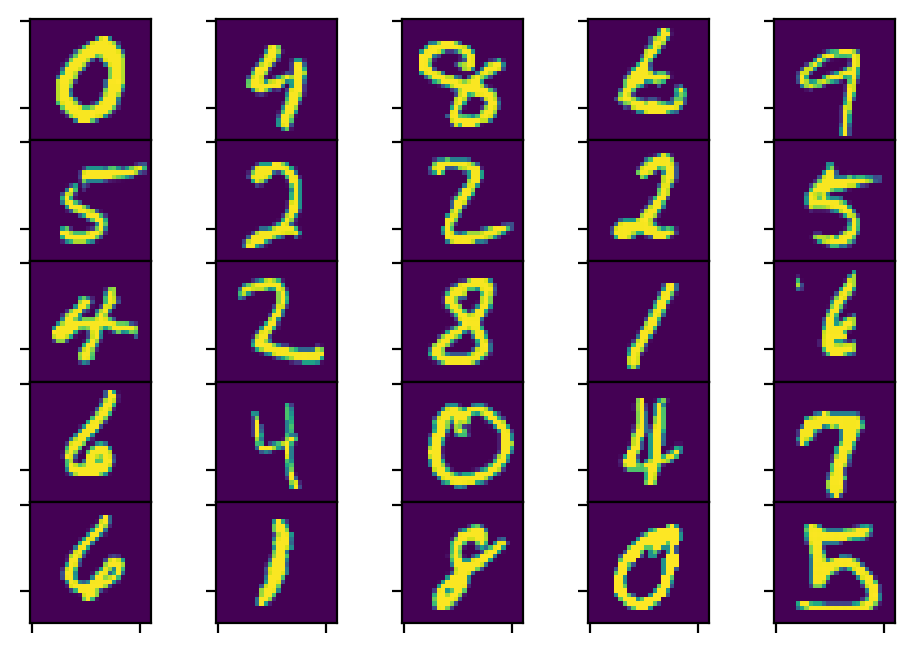

In [ ]:
def random_img() :
  random_row = np.array(mnist_df.iloc[np.random.randint(mnist_df.shape[0])].drop('label'))
  return random_row.reshape(28, 28)

fig, ax = plt.subplots(nrows = 5, ncols = 5)

fig.set_dpi(200)

for i in range(5) :
  for j in range(5) :
    ax[i][j].imshow(random_img())
    ax[i][j].set_xticklabels([])
    ax[i][j].set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### **Training the Model**

In [ ]:
x = mnist_df.drop('label', axis='columns')
y = (mnist_df['label']==8).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
#Normalizing Data
x_train = x_train/256
x_test = x_test/256 

#Use Stochastic Gradient Decsent Classifier
logistic_model=linear_model.SGDClassifier(random_state=42) 
logistic_model.fit(np.array(x_train), np.array(y_train))

SGDClassifier(random_state=42)

### **Evaluation of Model**

In [ ]:
logistic_model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9548412698412698

## **3. Neural Networks**

### **Representation**

![Simple Neural Network](https://www.holehouse.org/mlclass/08_Neural_Networks_Representation_files/Image%20[4].png)


<ul style="font-size: 18px;"><li style=""><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><b><font color="#E30000" face="'Times New Roman'"><span style="font-style: normal;">&nbsp;a</span><span style="border-collapse: separate; font-style: normal; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>i</sub></span><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>(j)</sup><span style="font-style: normal;">&nbsp;- activation of unit</span>&nbsp;<i style="">i&nbsp;</i>in layer&nbsp;<i>j&nbsp;</i></span></font></b></span><ul style=""><li style="">So,<span style="border-collapse: separate; font-style: normal; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="color: rgb(0, 0, 0); font-weight: normal; font-style: normal;">&nbsp;a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>1</sub></span><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup style="color: rgb(0, 0, 0); font-weight: normal;">2</sup><span style="font-style: normal;">&nbsp;- is the <b><font color="#1C3387">activation</font></b> of the 1st unit in the second layer</span></span></span></li><li style="">By activation, we mean the value which is computed and output by that node</li></ul></li><li style=""><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><b><font color="#E30000" face="'Times New Roman'"><span style="font-style: normal;">&nbsp;</span><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ<sup>(j)</sup><span style="font-style: normal;">&nbsp;</span>- matrix of parameters controlling the function mapping from layer&nbsp;<i>j</i>&nbsp;to layer&nbsp;<i>j</i>&nbsp;+ 1</span></font></b></span></span></span><ul style=""><li style=""><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Parameters for controlling</span> <span style="border-collapse: separate; font-variant: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><b><font color="#1C3387">mapping</font></b></span> <span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">from one layer to the next</span></span></span></span></li><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">If network has&nbsp;</span></span></span></span><ul style=""><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">s</span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>j</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">&nbsp;units in layer</span><span style="">&nbsp;</span><i style="">j</i>&nbsp;and&nbsp;</span></span></li><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">s</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>j+1</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">&nbsp;units in layer j + 1&nbsp;</span></span></span></li><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">T</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">hen&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>j</sup><span style="font-style: normal;">&nbsp;will be of dimensions</span></span></span> <span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">[</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">s</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>j+1 X&nbsp;</sub></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">s</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub style="">j</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">&nbsp;+ 1]</span></span></span><ul style=""><li style="">Because<ul><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">s</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>j+1<span>&nbsp;</span></sub></span></span>is equal to the number of units in layer (j + 1)</li><li style="">is equal to the number of units in layer j, plus an additional unit</li></ul></li></ul></li></ul></li><li style="">Looking at the&nbsp;<span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ matrix</span><br><ul><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">Column length</span></span></span>&nbsp;is the number of units in the following layer</li><li style="">Row length is the number of units in the current layer + 1 (because we have to map the bias unit)</li><li style="">So, if we had two layers - 101 and 21 units in each<ul><li style="">Then&nbsp;<span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>j</sup><span style="font-style: normal;">&nbsp;would be = [21 x 102]</span></span></span></li></ul></li></ul></li></ul></li><li style="">What are the computations which occur?<ul><li style="">We have to calculate the activation for each node</li><li style="">That activation depends on<ul><li style="">The input(s) to the node</li><li style="">The parameter associated with that node (from the&nbsp;<span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ vector associated with that layer)</span></li></ul></li></ul></li><li style=""><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; border-spacing: 0px; -webkit-text-decorations-in-effect: none; text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Below we have an example of a network, with the associated calculations for the four nodes below</span></li></ul>

Sequence of steps to compute output of hypothesis are the equations below

![Set of Equations governing neural network](https://www.holehouse.org/mlclass/08_Neural_Networks_Representation_files/Image%20[7].png)


### **Vectorization**

<ul style="font-size: 18px;"><li>Define some additional terms<ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>1</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;= </span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>10</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">x</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>0&nbsp;</sub></span></span>+&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>11</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">x</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>1&nbsp;</sub></span></span>+&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>12</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">x</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>2&nbsp;</sub></span></span>+&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>13</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">x3</span></span></span></span></span></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">Which means that</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>1</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;= g(</span></span></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>1</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">)</span></span></span></li></ul></li><li>NB, superscript numbers are the layer associated&nbsp;</li></ul></li><li>Similarly, we define the others as<ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>2</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;and&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>3</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;</span></span></span></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">These values are just a linear combination of the values</span></span></span></li></ul></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">If we look at the block we just redefined</span></span></span></li><li style="list-style-type: none; list-style-position: initial; list-style-image: initial; display: inline;"><ul><li>We can vectorize the neural network computation</li><li>So lets define</li><li style="list-style-type: none; list-style-position: initial; list-style-image: initial; display: inline;"><ul><li>x as the feature vector x</li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;as the vector of z values from the second layer</span></span></span>&nbsp;</li></ul></li></ul></li></ul>

![Some more equations](https://www.holehouse.org/mlclass/08_Neural_Networks_Representation_files/Image%20[8].png)


<ul style="font-size: 18px;"><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;is a 3x1 vector</span></span></span></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">We can vectorize the computation of the neural network as as follows in two steps</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;=&nbsp;</span></span></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ<sup>(1)</sup></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">x</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">i.e.&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">Ɵ<sup>(1)</sup></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">&nbsp;is the matrix defined above</span></span></span></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">x is the feature vector</span></span></span></li></ul></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">a<sup>2</sup></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">&nbsp;= g(</span></span></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">z<sup>(2)</sup></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">)</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">To be clear,&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;is a 3x1 vecor</span></span></span></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;is also a 3x1 vector</span></span></span></span></span></span></li><li>g() applies the sigmoid (logistic) function element wise to each member of the&nbsp;<span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;vector</span></span></span></li></ul></li></ul></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">To make the notation with input layer make sense;</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;">&nbsp;= x</span></span></span></span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;">&nbsp;is the activations in the input layer</span></span></span></span></span></span></span></span></span></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">Obviously the "activation" for the input layer is just the input!</span></span></span></span></span></span></span></span></span></li></ul></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">So we define x as&nbsp;</span></span></span></span></span></span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;">&nbsp;for clarity&nbsp;</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">So&nbsp;</span></span></span><ul><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>1</sup><span style="font-style: normal;">&nbsp;is the vector of inputs</span></span></span></li><li><span style="orphans: 2; text-align: -webkit-auto; text-indent: 0px; widows: 2; -webkit-text-decorations-in-effect: none;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; text-transform: none; white-space: normal; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px; font-style: normal;">a</span><span style="orphans: 2; text-align: -webkit-auto; text-indent: 0px; widows: 2; -webkit-text-decorations-in-effect: none;"><sup style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; text-transform: none; white-space: normal; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;">2</sup>&nbsp;is the vector of values&nbsp;calculated&nbsp;by the g(</span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">) function</span></span></span></li></ul></li></ul></li></ul></li><li><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">Having calculated then&nbsp;</span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">z</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;vector, we need to calculate&nbsp;</span></span></span></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><span style="font-style: normal;">a</span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sub>0</sub></span><span style="border-collapse: separate; color: rgb(0, 0, 0); font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: normal; orphans: 2; text-align: -webkit-auto; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-border-horizontal-spacing: 0px; -webkit-border-vertical-spacing: 0px; -webkit-text-decorations-in-effect: none; -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px;"><sup>2</sup><span style="font-style: normal;">&nbsp;for the final hypothesis calculation</span></span></span></li></ul>

In [ ]:
pixels = (img[:,:,0])/(256)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


4031

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41929,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41948,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41961,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41964,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
